In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.svm import SVC

In [8]:
svm = SVC(kernel='linear', probability=True)

In [9]:
svm.fit(X_train_std,y_train['target'].values)

SVC(kernel='linear', probability=True)

In [10]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [11]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [12]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [13]:
svm.predict_proba(X_test_std)

array([[0.94938699, 0.05061301],
       [0.00716036, 0.99283964],
       [0.97373806, 0.02626194],
       [0.00617103, 0.99382897],
       [0.01599293, 0.98400707],
       [0.1135718 , 0.8864282 ],
       [0.98433252, 0.01566748],
       [0.00460264, 0.99539736],
       [0.00828812, 0.99171188],
       [0.0148459 , 0.9851541 ],
       [0.02292631, 0.97707369],
       [0.02846571, 0.97153429],
       [0.00769505, 0.99230495],
       [0.98041579, 0.01958421],
       [0.96214958, 0.03785042],
       [0.94152253, 0.05847747],
       [0.98831805, 0.01168195],
       [0.87401133, 0.12598867],
       [0.9804604 , 0.0195396 ],
       [0.95616682, 0.04383318],
       [0.94938699, 0.05061301],
       [0.03285842, 0.96714158],
       [0.94934921, 0.05065079],
       [0.03529348, 0.96470652],
       [0.96728373, 0.03271627],
       [0.96962267, 0.03037733],
       [0.96212106, 0.03787894],
       [0.01984797, 0.98015203],
       [0.03787395, 0.96212605],
       [0.00574597, 0.99425403]])

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

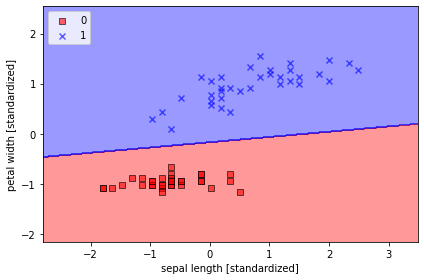

In [15]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = svm.predict(X_test)

Accuracy_Score = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Confusion Matrix:\n',CM)

Average Accuracy: 50.00 +/- (0.0) %
Confusion Matrix:
 [[ 0 15]
 [ 0 15]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
